In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import matplotlib as mpl
from tqdm.notebook import tqdm

In [138]:
def dist(x,a,c):
    a_ = a/(1-a*np.exp(2j*x))
    c_ = (c*np.exp(1j*x))/(1-c*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+a_+c_ + np.conj(a_)+np.conj(c_))
    return f
xs = np.linspace(0,np.pi*2,1000)

c:\Users\kim9y\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


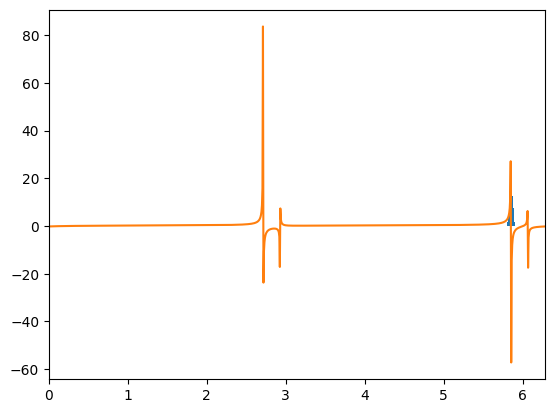

In [157]:
A = np.random.normal(3*np.pi/2-2,0.3,3000)
B = np.random.normal(np.pi/2-2,0.02,6000)
C = B#np.r_[A,B]
plt.hist(C%(2*np.pi),bins=100,density=True)
# plt.hist((2*C)%(2*np.pi),bins=100)
Z1 = np.mean(np.exp(1j*C))
Z2 = np.mean(np.exp(2j*C))

plt.xlim(0,2*np.pi)
f = dist(xs,Z2.conj(),Z1.conj())
plt.plot(xs,f)
x_ ,= np.where(f<0)
# plt.plot(xs,dist(xs,Z2.conj(),Z1.conj()))


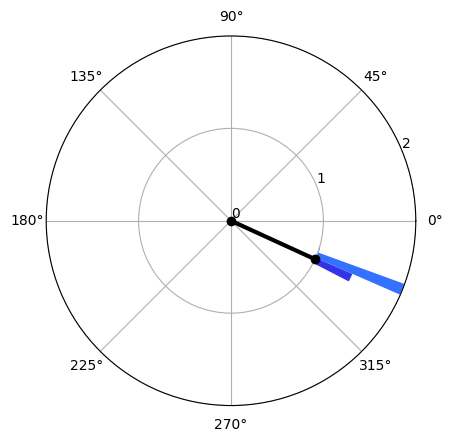

In [158]:

num_bin = 100
bins = np.linspace(0,2*np.pi,num_bin+1)
bin_ = np.linspace(0,2*np.pi,num_bin)
cs1,_ = np.histogram(C%(np.pi*2),bins=bins,density=True)
# cs2,_ = np.histogram(sol[-index,N1:]%(np.pi*2),bins=bins,density=True)
cs1 = cs1 / np.max(cs1)
# cs2 = cs2 / np.max(cs2)


bottom = 1
max_height = 1
radii1 = max_height*cs1
# radii2 = max_height*cs2
width = (2*np.pi) / num_bin

ax = plt.subplot(111, polar=True)
bars1 = ax.bar(bin_, radii1, width=width, bottom=bottom)
# bars2 = ax.bar(bin_, radii2, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii1, bars1):
    # bar.set_facecolor(plt.cm.autumn(r/5))
    bar.set_facecolor(plt.cm.jet(r/5))
    bar.set_alpha(0.8)
plt.plot([0,np.angle(Z1)],[0,abs(Z1)],color='black',lw=3,marker='o')
# for r, bar in zip(radii2, bars2):
#     bar.set_facecolor(plt.cm.jet_r(r/5))
#     bar.set_alpha(0.8)
plt.ylim(0,2)
plt.yticks([0,1,2])
plt.show()

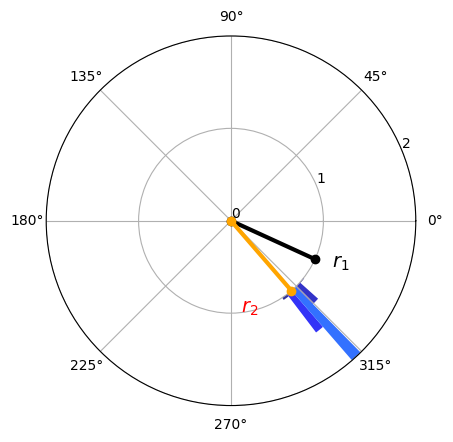

In [159]:

num_bin = 100
bins = np.linspace(0,2*np.pi,num_bin+1)
bin_ = np.linspace(0,2*np.pi,num_bin)
cs1,_ = np.histogram((2*C)%(2*np.pi),bins=bins,density=True)
# cs2,_ = np.histogram(sol[-index,N1:]%(np.pi*2),bins=bins,density=True)
cs1 = cs1 / np.max(cs1)
# cs2 = cs2 / np.max(cs2)


bottom = 1
max_height = 1
radii1 = max_height*cs1
# radii2 = max_height*cs2
width = (2*np.pi) / num_bin

ax = plt.subplot(111, polar=True)
bars1 = ax.bar(bin_, radii1, width=width, bottom=bottom)
# bars2 = ax.bar(bin_, radii2, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii1, bars1):
    # bar.set_facecolor(plt.cm.autumn(r/5))
    bar.set_facecolor(plt.cm.jet(r/5))
    bar.set_alpha(0.8)
plt.plot([0,np.angle(Z1)],[0,abs(Z1)],color='black',lw=3,marker='o')
plt.plot([0,np.angle(Z2)],[0,abs(Z2)],color='orange',lw=3,marker='o')
plt.text(np.angle(Z2)-0.6,abs(Z2),r'$r_2$',color='red',fontsize=14)
plt.text(np.angle(Z1),abs(Z1)+0.2,r'$r_1$',color='black',fontsize=14)
# for r, bar in zip(radii2, bars2):
#     bar.set_facecolor(plt.cm.jet_r(r/5))
#     bar.set_alpha(0.8)
plt.ylim(0,2)
plt.yticks([0,1,2])
plt.show()

In [156]:
abs(Z1),abs(Z2)

(0.01454847823666994, 0.01734778903543211)

(array([0.00888446, 0.00710757, 0.00533067, 0.0213227 , 0.01599202,
        0.03020716, 0.05152986, 0.05330675, 0.05863742, 0.09772904,
        0.1279362 , 0.12438241, 0.15281268, 0.18835051, 0.20256564,
        0.26653374, 0.31095603, 0.34827075, 0.360709  , 0.39980061,
        0.4655456 , 0.4868683 , 0.47620695, 0.51885235, 0.49219897,
        0.54372883, 0.52240613, 0.51529857, 0.46732249, 0.41934642,
        0.46021493, 0.40335439, 0.33227873, 0.27008752, 0.27719509,
        0.25231861, 0.18124294, 0.18835051, 0.13682065, 0.12260552,
        0.07640634, 0.05508364, 0.0426454 , 0.02487648, 0.0213227 ,
        0.03020716, 0.02309959, 0.00888446, 0.00355378, 0.00888446,
        0.00710757, 0.00888446, 0.00355378, 0.01066135, 0.01066135,
        0.01954581, 0.03376094, 0.03376094, 0.03020716, 0.04442229,
        0.04442229, 0.04975296, 0.07107566, 0.0852908 , 0.10128282,
        0.12260552, 0.16169714, 0.18124294, 0.19190429, 0.21678078,
        0.19368118, 0.28607955, 0.24876482, 0.24

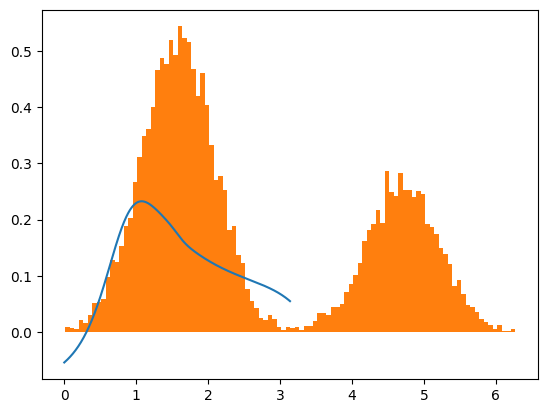

In [60]:
x1 = xs[:len(xs)//2]
x2 = xs[len(xs)//2:]

f1 = dist(x1,Z2.conj(),Z1.conj())
f2 = dist(x2,Z2.conj(),Z1.conj())
plt.plot(x1,f1-f2)



f1_arg, = np.where(f1<0)
f2_arg, = np.where(f2<0)
f1_0 = np.where(f1<0,0,f1)
f2_0 = np.where(f2<0,0,f2)

# f1_m = np.where(f1<0,f1,0)
# f2_m = np.where(f2<0,f2,0)
# f1_0[f1_arg] -= f2[f1_arg]
f1_0[f2_arg] -= f2[f2_arg]#[::-1]
f2_0[f1_arg] -= f1[f1_arg]#[::-1]
# f1_0[f1_arg] -= f2[f1_arg][::-1]
# # plt.plot(f1_0)
# plt.plot(x1,f1_0)
# # plt.plot(x2,f2_0)

plt.hist(C%(2*np.pi),bins=100,density=True)


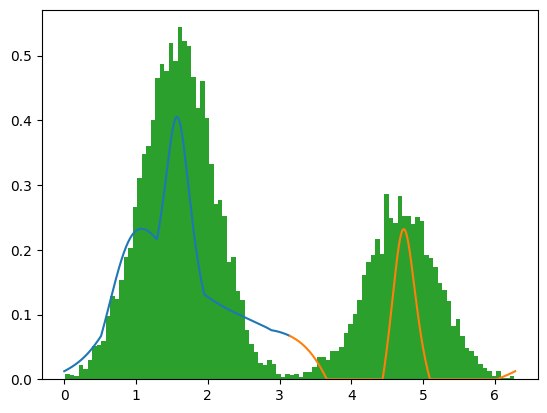

In [61]:
plt.plot(x1,f1_0)
plt.plot(x2,f2_0)

plt.hist(C%(2*np.pi),bins=100,density=True)
# plt.hist((2*C)%(2*np.pi),bins=100)
Z1 = np.mean(np.exp(1j*C))
Z2 = np.mean(np.exp(2j*C))

In [51]:

x_ ,= np.where(f<0)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
np.abs(Z2)

0.833749263077023

In [ ]:
for index in range(1,50000,5000):
    num_bin = 50
    bins = np.linspace(0,2*np.pi,num_bin+1)
    bin_ = np.linspace(0,2*np.pi,num_bin)
    cs1,_ = np.histogram(sol[-index,:N1]%(np.pi*2),bins=bins,density=True)
    cs2,_ = np.histogram(sol[-index,N1:]%(np.pi*2),bins=bins,density=True)
    cs1 = cs1 / np.max(cs1)
    cs2 = cs2 / np.max(cs2)


    bottom = 1
    max_height = 2
    radii1 = max_height*cs1
    radii2 = max_height*cs2
    width = (2*np.pi) / num_bin

    ax = plt.subplot(111, polar=True)
    bars1 = ax.bar(bin_, radii1, width=width, bottom=bottom)
    # bars2 = ax.bar(bin_, radii2, width=width, bottom=bottom)

    # Use custom colors and opacity
    for r, bar in zip(radii1, bars1):
        bar.set_facecolor(plt.cm.jet(r/5))
        bar.set_alpha(0.8)

    # for r, bar in zip(radii2, bars2):
    #     bar.set_facecolor(plt.cm.jet_r(r/5))
    #     bar.set_alpha(0.8)

    plt.show()

# Phase diagram

In [179]:
def d_fun(X,Y,t,alpha,beta):
    theta,dtheta = X,Y
    dtheta = theta
    ddtheta = -alpha * dtheta + beta - np.sin(theta)
    return dtheta,ddtheta

def f(x,alpha,beta):
    return (beta-np.sin(x))/alpha

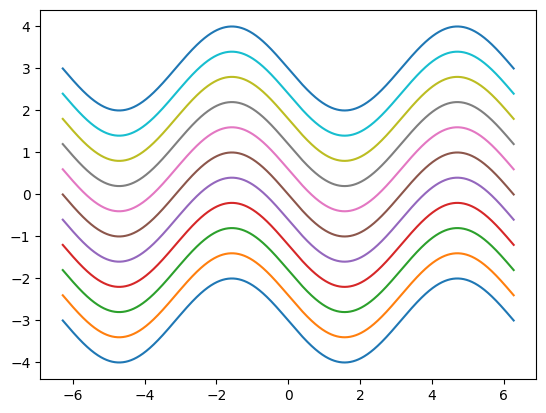

In [184]:
xs = np.linspace(-2*np.pi,2*np.pi,2000)
betas = np.linspace(-3,3,11)
alpha = 1
beta = 0.5
for beta in betas:
    plt.plot(xs,f(xs,alpha,beta))


In [ ]:
M = (np.hypot(DX,DY))
plt.contour(X,Y,M,levels=100)

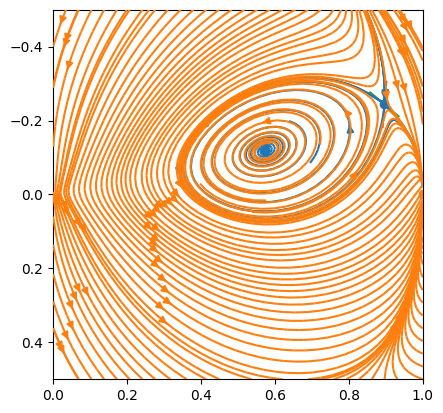

In [ ]:
DP_ = np.array([psis[0],psis[0]+d_p1/50,psis[0]-d_p1/50,psis[0]+d_p2/50,psis[0]-d_p2/50,psis[0],psis[1],0],dtype=float)
DR_ = np.array([Rs[0],Rs[0]+d_r1/50,Rs[0]-d_r1/50,Rs[0]+d_r2/50,Rs[0]-d_r2/50,Rs[0],Rs[1],1],dtype=float)
X_ = DR_*np.cos(DP_)
Y_ = DR_*np.sin(DP_)
# Q = plt.quiver(X,Y,U,V,M,pivot='mid',cmap='jet',zorder=3)
seed_points = np.array([(*X_,0.8),(*Y_,-0.2)])
plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=3,start_points=seed_points.T,broken_streamlines=False)
plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=3,broken_streamlines=False)
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))

plt.plot(x_[:2],y_[:2])
plt.plot(x_[2:],y_[2:])
# plt.plot((X_0-0.950682959640321/20,X_0+0.950682959640321/20),(Y_0-0.310164327815949/20,Y_0+0.310164327815949/20))
# plt.plot((X_0+0.3875/20,X_0-0.3875/20),(Y_0-0.9254/20,Y_0+0.9254/20))
# plt.plot((0,-0.387),(0,0.9254))
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

In [185]:
from sympy import *

In [189]:
alpha,beta,theta = symbols('alpha beta theta')
B = IndexedBase('B')
A = IndexedBase('A')

In [193]:
f = (beta-alpha*beta/alpha) + (alpha*B[1]-1)*sin(theta) + alpha *A[1]*cos(theta)
f2 = (B[1]*cos(theta) - A[1]*sin(theta))*(beta/alpha +A[1]*cos(theta) + B[1]*sin(theta))

In [200]:
(f - f2).collect(B[1]).expand()

alpha*sin(theta)*B[1] + alpha*cos(theta)*A[1] + sin(theta)**2*A[1]*B[1] + sin(theta)*cos(theta)*A[1]**2 - sin(theta)*cos(theta)*B[1]**2 - sin(theta) - cos(theta)**2*A[1]*B[1] + beta*sin(theta)*A[1]/alpha - beta*cos(theta)*B[1]/alpha

In [218]:
f2.expand()

-sin(theta)**2*A[1]*B[1] - sin(theta)*cos(theta)*A[1]**2 + sin(theta)*cos(theta)*B[1]**2 + cos(theta)**2*A[1]*B[1] - beta*sin(theta)*A[1]/alpha + beta*cos(theta)*B[1]/alpha

In [201]:
A1 = (alpha  *B[1] - 1)/(alpha *(B[1]*sin(theta)+beta))

In [202]:
F =B[1]*A[1]*cos(theta) + beta/alpha * B[1] + (B[1]**2 - A[1]**2)*sin(theta) - alpha * A[1]

In [ ]:
solve(F.subs(A[1],A1),B[1])

In [206]:
BB = F.subs(A[1],A1).simplify()

In [207]:
n,d=fraction(BB)

In [213]:
n.expand().collect(B[1])

alpha**2*beta + alpha**2*sin(theta)**3*B[1]**4 + (2*alpha**2*beta*sin(theta)**2 + alpha**2*sin(theta)*cos(theta) + alpha*beta*sin(theta)**2)*B[1]**3 + (-alpha**3*beta + alpha**2*sin(theta) + alpha*beta**3 - alpha*beta*cos(theta) + 2*alpha*sin(theta))*B[1] + (-alpha**3*sin(theta) + alpha**2*beta**2*sin(theta) + alpha**2*beta*cos(theta) - alpha**2*sin(theta) + 2*alpha*beta**2*sin(theta) - alpha*sin(theta)*cos(theta))*B[1]**2 - sin(theta)

In [217]:
f.series(theta)

theta*(alpha*B[1] - 1) + theta**3*(-alpha*B[1]/6 + 1/6) + theta**5*(alpha*B[1]/120 - 1/120) + alpha*A[1] - alpha*theta**2*A[1]/2 + alpha*theta**4*A[1]/24 + O(theta**6)

In [222]:
f2.series(theta)

beta*B[1]/alpha + A[1]*B[1] + theta*(-A[1]**2 + B[1]**2 - beta*A[1]/alpha) + theta**2*(-2*A[1]*B[1] - beta*B[1]/(2*alpha)) + theta**3*(2*A[1]**2/3 - 2*B[1]**2/3 + beta*A[1]/(6*alpha)) + theta**4*(2*A[1]*B[1]/3 + beta*B[1]/(24*alpha)) + theta**5*(-2*A[1]**2/15 + 2*B[1]**2/15 - beta*A[1]/(120*alpha)) + O(theta**6)

In [223]:
f.series(theta)

theta*(alpha*B[1] - 1) + theta**3*(-alpha*B[1]/6 + 1/6) + theta**5*(alpha*B[1]/120 - 1/120) + alpha*A[1] - alpha*theta**2*A[1]/2 + alpha*theta**4*A[1]/24 + O(theta**6)